In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 649.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.0/960.0 kB 694.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 458.3 kB/s eta 0:00:001m563.4 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 kB 4.0 MB/s eta 0:00:00m eta 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homeb

## 1) Data Load

In [5]:
dataset = pd.read_csv("data/Salary_Data.csv")
print(dataset)
print(dataset.shape)
print(type(dataset))

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
(30, 2)
<class 'pandas.core.frame.DataFrame'>


## 2) feature(X)와 actual value(y) 분리

In [33]:
# 경력으로 연봉을 예측하는 모델 만들기
# X = YearsExperience
# y = Salary

# .values : ndarray로 가져오기 위해 값만 추출
# [:,:-1] : 첫 열부터 마지막 열 제외하고 그 전까지. (이렇게 범위 지정 시, 2dArray로 반환)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
print(X,y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


## 3) tranning / test data 분리

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(6, 1)
(6, 1)


## 4) linear regression model 생성

In [49]:
from sklearn.linear_model import LinearRegression
# Simple Linear Regression
sLR = LinearRegression()

In [50]:
#sLR 모델 학습, (학습데이터 적용)
# sklearn에 적용할 X 데이터는 모두 2dArray여야 한다.
sLR.fit(X_train, y_train)

LinearRegression()

## 5) prediction

In [51]:
#모델에 새로운 X값을 전달시, 예측값 반환
sLR.predict([[6.5]])

array([[86576.38261148]])

In [52]:
y_pred = sLR.predict(X_test)
print(y_pred)

[[115790.21011287]
 [ 71498.27809463]
 [102596.86866063]
 [ 75267.80422384]
 [ 55477.79204548]
 [ 60189.69970699]]


## 6) 결과 시각화

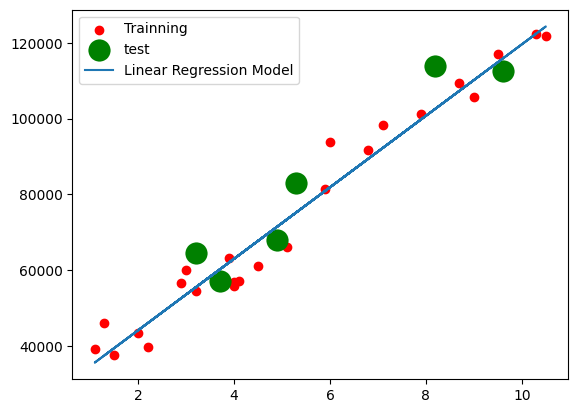

In [64]:
# X,y 축으로 산점도 시각화
plt.scatter(X_train,y_train,color='red',label='Trainning')
plt.scatter(X_test,y_test,color='green',linewidth=10,label='test')
plt.legend() #label 표시


plt.plot(X_train,sLR.predict(X_train), label='Linear Regression Model')
plt.legend()

## 50_Startups.csv 데이터로 Linear Regression model 구축

In [77]:
start = pd.read_csv("data/50_Startups.csv")
X = start.iloc[:,0:3].values
y = start.iloc[:,-1:].values

## 2-1) X,y 축 Train, test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression
# Simple Linear Regression
sLR2 = LinearRegression()

In [84]:
sLR2.fit(X_train,y_train)

LinearRegression()

In [86]:
sLR2.predict(X_test)

array([[126703.02716461],
       [ 84894.75081556],
       [ 98893.41815974],
       [ 46501.70815036],
       [129128.39734381],
       [ 50992.69486261],
       [109016.5536578 ],
       [100878.4641454 ],
       [ 97700.59638629],
       [113106.15292226]])

In [88]:
y_pred2 = sLR2.predict(X_test)
print(y_pred)

[[115790.21011287]
 [ 71498.27809463]
 [102596.86866063]
 [ 75267.80422384]
 [ 55477.79204548]
 [ 60189.69970699]]
